In [5]:
# Mod5-Challenge

# depencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# study data files
mouse_metadata_path = Path("Documents/StCode/PyMice1/data/Mouse_metadata.csv")
study_results_path = Path("Documents/StCode/PyMice1/data/Study_results.csv")

#read the mouse data and the study results
mousedata = pd.read_csv(mouse_metadata_path)
studyresults = pd.read_csv(study_results_path)

#combine data sets and display
pymicedatacomb = pd.merge(mousedata, studyresults, how="left", on=["Mouse ID", "Mouse ID"])
pymicedatacomb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Number of mice
len(mousedata)



249

In [28]:
#find duplicate ID
dupid = pymicedatacomb.loc[pymicedatacomb["Mouse ID"].str.contains("g989")]
dupid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
Drindex = pymicedatacomb[pymicedatacomb['Mouse ID']=='g989'].index
pymice2 = pymicedatacomb.drop(Drindex)
pymice2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
len(pymice2)

1880

In [66]:
a = pymicedatacomb.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
b = pymicedatacomb.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
c = pymicedatacomb.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
d = pymicedatacomb.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sumstats1 = pd.merge(a, b, on='Drug Regimen')
sumstats2 = pd.merge(c, d, on='Drug Regimen')
Allstats = pd.merge(sumstats1, sumstats2, how="left", on=("Drug Regimen"))
Allstats.head()

,Tumor Volume (mm3)_x_x,Tumor Volume (mm3)_y_x,Tumor Volume (mm3)_x_y,Tumor Volume (mm3)_y_y
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708


In [65]:
agrodata = pymicedatacomb["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agrodata.head()

mean      50.448381
median    48.951474
var       79.116074
std        8.894722
sem        0.204436
Name: Tumor Volume (mm3), dtype: float64

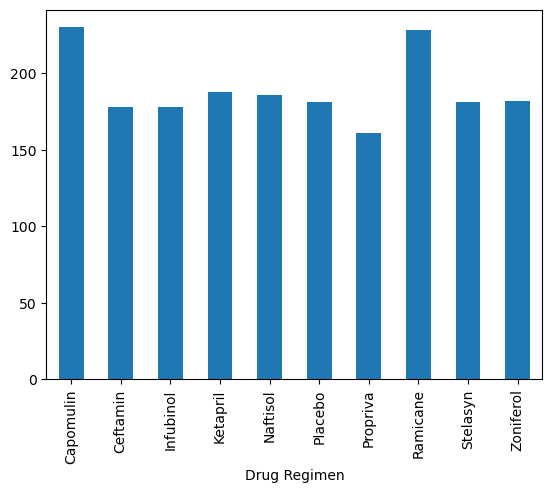

In [87]:
count = pymicedatacomb.groupby("Drug Regimen")["Timepoint"].count()
count.plot.bar(x:= "Drug Regimen" , y:= "Timepoint");


In [165]:

sexcount1 = mousedata.groupby("Sex").count()
sexcount1
Permale = sexcount1/249 * 100
Permale

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,49.799197,49.799197,49.799197,49.799197
Male,50.200803,50.200803,50.200803,50.200803


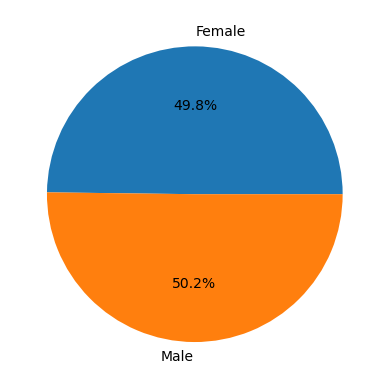

In [166]:

Permale
values = Permale['Mouse ID']
Sexs = ["Female","Male"]
plt.pie(values,labels=Sexs,autopct="%2.1f%%")
plt.show()


In [172]:
micendtime = pymicedatacomb.groupby("Timepoint")["Mouse ID"].max()
micendtime

Timepoint
0     z969
5     z969
10    z969
15    z969
20    z969
25    z969
30    z969
35    z969
40    z969
45    z969
Name: Mouse ID, dtype: object

In [174]:
Newpd = pd.merge(pymicedatacomb, micendtime, how="left", on=["Mouse ID", "Timepoint"])
Newpd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [190]:
treats = ["Ramicane","Capomulin","Infubinol","Ceftamin"]
tumvol = []
for string in Newpd:
   if Newpd["Mouse ID"] == treats & Newpd["Timepoint"] >= 45:
     tumvol = Newpd["Tumor Volume (mm3)"]



ValueError: operands could not be broadcast together with shapes (4,) (1893,) 